# Jax PlayGround

My starting notebook where I install all of the necessary libraries and load some easy 1D/2D Regression data to play around with.

In [ ]:
#@title Install Packages

!pip install jax jaxlib numpyro flax 
!pip install "git+https://github.com/Information-Fusion-Lab-Umass/NoX.git#egg=NoX"

     |████████████████████████████████| 163kB 9.1MB/s 
     |████████████████████████████████| 71kB 6.6MB/s 
ERROR: numpyro 0.2.4 has requirement jax==0.1.57, but you'll have jax 0.1.62 which is incompatible.
ERROR: numpyro 0.2.4 has requirement jaxlib==0.1.37, but you'll have jaxlib 0.1.42 which is incompatible.
  Cloning https://github.com/Information-Fusion-Lab-Umass/NoX.git to /tmp/pip-install-89gucx9r/NoX
  Running command git clone -q https://github.com/Information-Fusion-Lab-Umass/NoX.git /tmp/pip-install-89gucx9r/NoX
  Created wheel for nox-if: filename=nox_if-0.0.12-cp36-none-any.whl size=32574 sha256=2675a5fbf4d8e6e963c1b1c0d415121ecfa00097cbc19431602b4b22ceaf34d4
  Stored in directory: /tmp/pip-ephem-wheel-cache-ec74yz9h/wheels/94/40/b6/99e0f4753e677e3e1c634005f07c71c620968d499cc510d77e
  ERROR: Failed building wheel for nox-if
  Running setup.py clean for nox-if
  ERROR: Failed cleaning build dir for nox-if
Successfully built nox-if
Failed to build nox-if


In [ ]:
#@title Load Packages
from typing import Tuple, Optional, Dict, Callable
import jax
import jax.numpy as np
import jax.random as random
import numpy as onp

import numpyro
import numpyro.distributions as dist
from numpyro.infer import SVI

import logging
logger = logging.getLogger()
logger.setLevel(logging.DEBUG)

import matplotlib.pyplot as plt
import seaborn as sns

sns.reset_defaults()
#sns.set_style('whitegrid')
#sns.set_context('talk')
sns.set_context(context='talk',font_scale=0.7)
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#@title Data
def get_data(
    N: int = 30,
    input_noise: float = 0.15,
    output_noise: float = 0.15,
    N_test: int = 400,
) -> Tuple[np.ndarray, np.ndarray, np.ndarray, None]:
    onp.random.seed(0)
    X = np.linspace(-1, 1, N)
    Y = X + 0.2 * np.power(X, 3.0) + 0.5 * np.power(0.5 + X, 2.0) * np.sin(4.0 * X)
    Y += output_noise * onp.random.randn(N)
    Y -= np.mean(Y)
    Y /= np.std(Y)

    X += input_noise * onp.random.randn(N)

    assert X.shape == (N,)
    assert Y.shape == (N,)

    X_test = np.linspace(-1.2, 1.2, N_test)

    return X[:, None], Y[:, None], X_test[:, None]


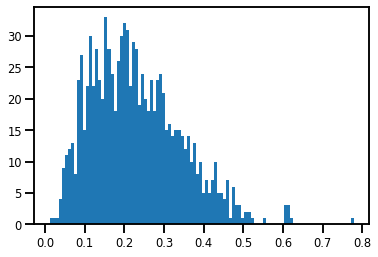

In [ ]:
#@title Distribution Data
from scipy.stats import beta

a, b = 3.0, 10.0
data_dist = beta(a, b)


x_samples = data_dist.rvs(1_000, 123)

# x_samples = data_dist.rvs(1_000, 123)

plt.hist(x_samples, bins=100);

# KDE Transformation

## PDF Estimation

$$
\hat{f}(x) = \frac{1}{n}\sum_{i}f_i(x)
$$

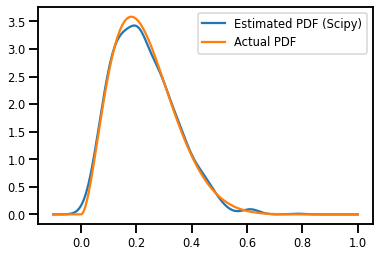

In [ ]:
from scipy import stats

precision = 1_000
x = onp.linspace(-.1, 1.0, precision)
kde_clf_scipy = stats.gaussian_kde(x_samples, bw_method='silverman')

x_pdf_sci = kde_clf_scipy.evaluate(x)

plt.figure()
plt.plot(x, x_pdf_sci, label='Estimated PDF (Scipy)')
plt.plot(x, data_dist.pdf(x), label='Actual PDF')
plt.legend()
plt.show()

In [ ]:
precision = 2_000
x = onp.linspace(-.1, 1.0, precision)

%timeit _ = kde_clf_scipy.evaluate(x)
%timeit _ = kde_clf_sm.evaluate(x)

10 loops, best of 3: 55.1 ms per loop
10 loops, best of 3: 48.4 ms per loop


### CDF Estimation

* A KDE is a mixture density
* CDF is a mixture of CDFs

In [ ]:
%timeit _ = kde_cdf_f(x)

10 loops, best of 3: 65.9 ms per loop


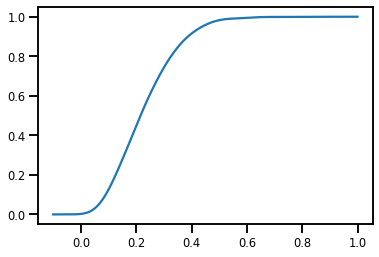

In [ ]:
np.vectorize(lambda x: ag.integrate_box_1d(-np.inf, x))

from scipy import stats

precision = 1_000
x = onp.linspace(-.1, 1.0, precision)
kde_clf_scipy = stats.gaussian_kde(x_samples, bw_method='silverman')

x_pdf_sci = kde_clf_scipy.evaluate(x)
kde_cdf_f = onp.vectorize(lambda x: kde_clf_scipy.integrate_box_1d(-onp.inf, x))
x_cdf_sci = kde_cdf_f(x)

plt.plot(x, x_cdf_sci)

### Quantile Function

In [ ]:
from scipy import stats
n_quantiles = 1_000
x_icdf = stats.mstats.mquantiles(x, np.linspace(0, 1, n_quantiles))

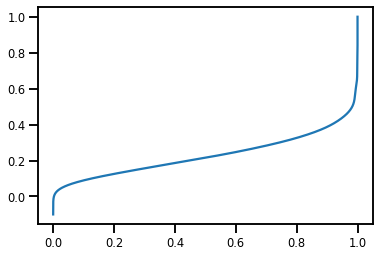

In [ ]:
plt.plot(x_cdf_sci, x_icdf)

In [ ]:
import statsmodels.api as sm

In [ ]:
kde_clf = sm.nonparametric.KDEUnivariate(x_samples)
kde_clf.fit()
t = kde_clf.endog

In [ ]:
x

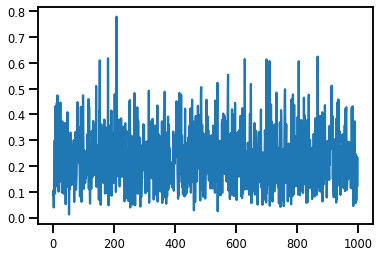

In [ ]:
plt.plot(t)

ValueError: ignored

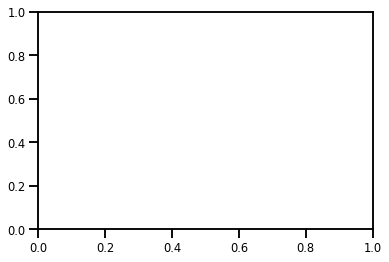

In [ ]:
kde_clf_sm = sm.nonparametric.KDEUnivariate(x_samples)
kde_clf_sm.fit()

precision = 1_000
x = onp.linspace(-.1, 1.0, precision)

x_pdf_sm = kde_clf_sm.evaluate(x)
x_cdf_cm = kde_clf_sm.cdf

plt.plot(x, x_cdf_cm)

# plt.

In [ ]:
quantiles.min(), quantiles.max()

(-0.1, -0.08900000000000001)

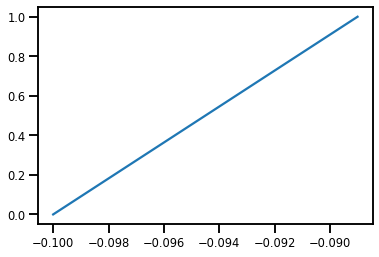

In [ ]:
plt.plot(quantiles, references)
# plt.plot(x, data_dist.cdf(x))